# Least Square Problem for Polynomial Regression
<hr>

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load point data 

In [2]:
filename    = 'Assignment 04 data.csv'
data        = np.loadtxt(filename, delimiter=',')

x   = data[0, :]     # 독립 변수
y   = data[1, :]     # 종속 변수

x2  = x[::10]       
y2  = y[::10]

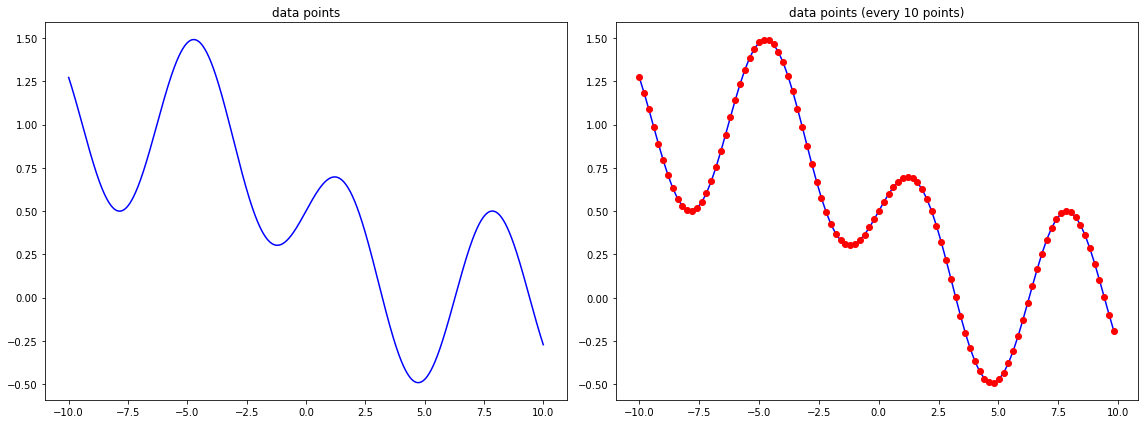

In [3]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x, y, '-', color='blue')
plt.title('data points')

plt.subplot(122)
plt.plot(x2, y2, '-', color='blue')
plt.plot(x2, y2, 'o', color='red')
plt.title('data points (every 10 points)')

plt.tight_layout()
plt.show()

## define a function to solve the polynomial regression

In [4]:
def construct_matrix_A(x, p):
    n = x.shape[0]     # x 데이터 개수 
    A = np.zeros((n, p))     # n*p 크기 행렬 생성
    
    for i in range(0, p):
        A[:, i] = np.power(x[:], i)     # 각 자리에 제곱값 넣기
    return A



def solve_polynomial_regression(x, y, p, alpha=0):
    A = construct_matrix_A(x, p)     # A 행렬 생성해 가져옴     
    AtA = np.matmul(A.T, A)
    iAtA = np.linalg.inv(AtA + alpha)     # alpha가 있으면 parameter에 적용함
    
    param = np.matmul(np.matmul(iAtA, A.T), y)
        
    h = 0
    for i in range(0, p):
        h += param[i] * np.power(x, i)
    return h

In [5]:
h_01        = solve_polynomial_regression(x, y, 1)
h_02        = solve_polynomial_regression(x, y, 2)
h_04        = solve_polynomial_regression(x, y, 4)
h_08        = solve_polynomial_regression(x, y, 8)
h_16        = solve_polynomial_regression(x, y, 16)
h_32        = solve_polynomial_regression(x, y, 32)

h_24_0      = solve_polynomial_regression(x, y, 24, 0)
h_24_00001  = solve_polynomial_regression(x, y, 24, 0.0001)
h_24_0001   = solve_polynomial_regression(x, y, 24, 0.001)
h_24_001    = solve_polynomial_regression(x, y, 24, 0.01)
h_24_01     = solve_polynomial_regression(x, y, 24, 0.1)
h_24_1      = solve_polynomial_regression(x, y, 24, 1)

## define a function for the visualization

In [6]:
def plot_polynomial_regression_3x2(x, y, h_01, title_01, h_02, title_02, h_04, title_04, h_08, title_08, h_16, title_16, h_32, title_32):
    plt.figure(figsize=(16,18))

    plt.subplot(321)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_01, '-', color='red')
    plt.title(title_01)

    plt.subplot(322)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_02, '-', color='red')
    plt.title(title_02)

    plt.subplot(323)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_04, '-', color='red')
    plt.title(title_04)

    plt.subplot(324)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_08, '-', color='red')
    plt.title(title_08)

    plt.subplot(325)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_16, '-', color='red')
    plt.title(title_16)

    plt.subplot(326)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_32, '-', color='red')
    plt.title(title_32)

    plt.tight_layout()
    plt.show()

# Results
<hr>

## 01. plot the input data in blue and the polynomial approximations with varying degrees in red ($p = 1, 2, 4, 8, 16, 32$)

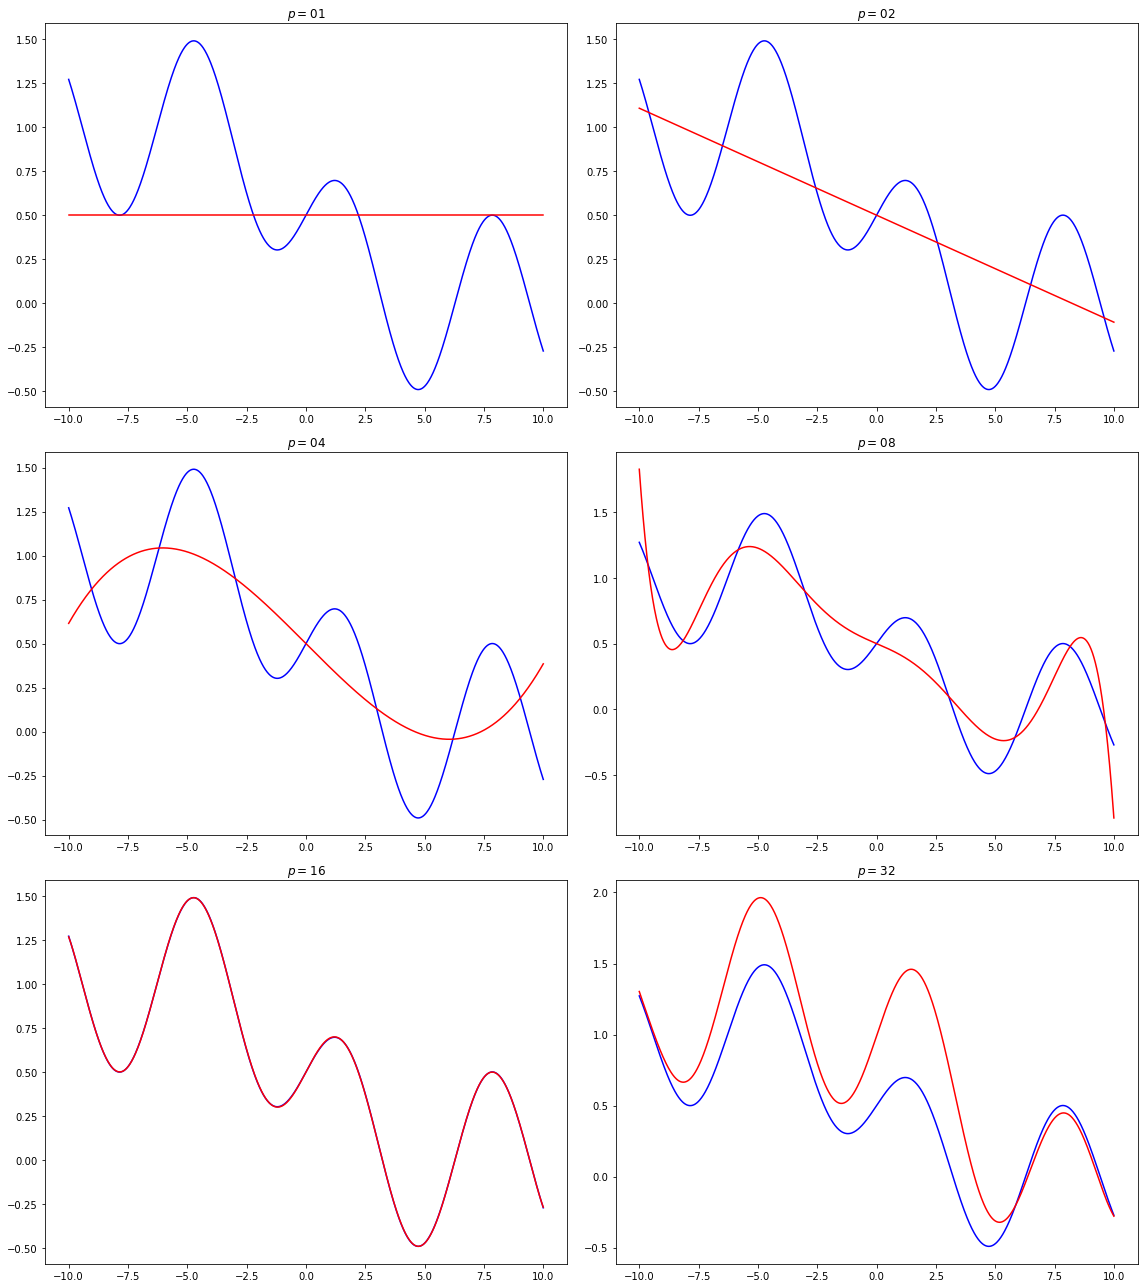

In [7]:
plot_polynomial_regression_3x2(x, y, h_01, '$p = 01$', h_02, '$p = 02$', h_04, '$p = 04$', h_08, '$p = 08$', h_16, '$p = 16$', h_32, '$p = 32$')

## 02. plot the input data in blue and the polynomial approximations with varying regularization parameters at $p = 24$ ($\alpha = 0, 0.0001, 0.001, 0.01, 0.1, 1$)

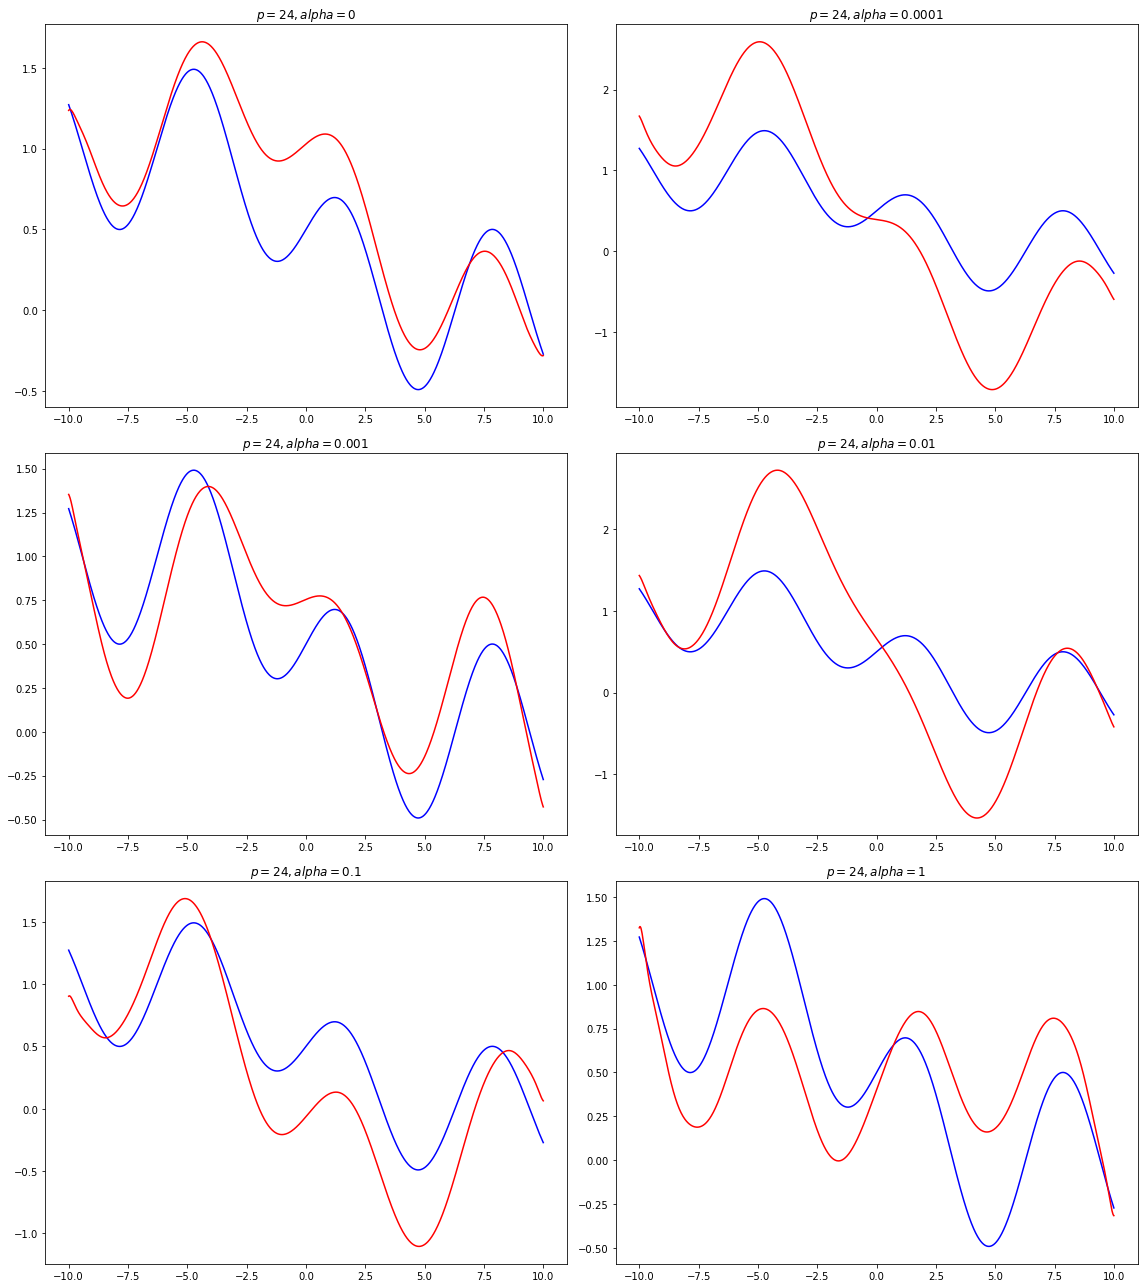

In [8]:
plot_polynomial_regression_3x2(x, y, h_24_0, '$p = 24, alpha = 0$', h_24_00001, '$p = 24, alpha = 0.0001$', h_24_0001, '$p = 24, alpha = 0.001$', h_24_001, '$p = 24, alpha = 0.01$', h_24_01, '$p = 24, alpha = 0.1$', h_24_1, '$p = 24, alpha = 1$')